# Wuzzuf Job Market Analysis - Skills Demand Analysis

This notebook analyzes the most in-demand technical and soft skills in the Wuzzuf job market data.

## Business Question:
**What are the top technical and soft skills in demand?**

This analysis examines skill requirements across job postings to identify the most sought-after technical and soft skills, providing insights for career development and hiring strategies.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import os
from pathlib import Path

# Add sql directory to path for database utilities
sys.path.append('../sql')
from database_setup import DatabaseManager

# Configure display and warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create charts directory if it doesn't exist
charts_dir = Path('../assets/charts')
charts_dir.mkdir(parents=True, exist_ok=True)

print("Libraries imported successfully")
print(f"Charts will be saved to: {charts_dir.absolute()}")

Libraries imported successfully
Charts will be saved to: c:\Users\hp\Downloads\wuzuf-analysis\notebooks\..\assets\charts


In [11]:
# Initialize database connection
print("Connecting to PostgreSQL database...")

try:
    db_manager = DatabaseManager()
    engine = db_manager.get_engine()
    
    # Test connection
    status = db_manager.test_connection()
    print(f"✅ Connected to database: {status['database']}")
    print(f"📊 Tables available: {status['table_count']}")
    
except Exception as e:
    print(f"❌ Database connection failed: {e}")
    print("Please ensure PostgreSQL is running and database is set up correctly")
    raise

Connecting to PostgreSQL database...


2025-08-14 22:15:25,632 - WARNING - Connection attempt 1 failed: (psycopg2.OperationalError) could not translate host name "postgres" to address: No such host is known. 

(Background on this error at: https://sqlalche.me/e/20/e3q8)
2025-08-14 22:15:29,929 - WARNING - Connection attempt 2 failed: (psycopg2.OperationalError) could not translate host name "postgres" to address: No such host is known. 

(Background on this error at: https://sqlalche.me/e/20/e3q8)


KeyboardInterrupt: 

## Skills Demand Analysis

This analysis examines skill requirements across job postings to identify the most sought-after skills.

In [12]:
# Skills Demand Analysis
print("🔍 Analysis: Skills Demand")
print("=" * 50)

# First, let's examine the skills data structure
skills_overview_query = """
SELECT 
    COUNT(DISTINCT s.skill_id) as total_skills,
    COUNT(DISTINCT js.job_id) as jobs_with_skills,
    COUNT(*) as total_skill_mentions
FROM skills s
JOIN job_skills js ON s.skill_id = js.skill_id;
"""

skills_overview = pd.read_sql(skills_overview_query, engine)
print("📊 Skills Data Overview:")
print(f"Total unique skills: {skills_overview['total_skills'].iloc[0]:,}")
print(f"Jobs with skills data: {skills_overview['jobs_with_skills'].iloc[0]:,}")
print(f"Total skill mentions: {skills_overview['total_skill_mentions'].iloc[0]:,}")

print("\n" + "-" * 50)

🔍 Analysis: Skills Demand
📊 Skills Data Overview:
Total unique skills: 167
Jobs with skills data: 22,904
Total skill mentions: 159,894

--------------------------------------------------


In [13]:
# SQL query for top technical and soft skills overall
top_skills_query = """
SELECT 
    s.skill_name,
    s.skill_category,
    COUNT(js.job_id) as job_count,
    ROUND(COUNT(js.job_id) * 100.0 / (SELECT COUNT(DISTINCT job_id) FROM job_skills), 2) as percentage_of_jobs
FROM skills s
JOIN job_skills js ON s.skill_id = js.skill_id
WHERE s.skill_name IS NOT NULL 
    AND s.skill_name != ''
GROUP BY s.skill_name, s.skill_category
ORDER BY job_count DESC
LIMIT 15;
"""

# Execute query and display results
top_skills_df = pd.read_sql(top_skills_query, engine)
print("🛠️ Top 15 Skills Overall (Technical & Soft):")
print(top_skills_df.to_string(index=False))

print("\n" + "-" * 50)

🛠️ Top 15 Skills Overall (Technical & Soft):
     skill_name skill_category  job_count  percentage_of_jobs
          cloud      technical       8549               37.33
            sql      technical       8412               36.73
         python      technical       7986               34.87
            aws      technical       7038               30.73
    programming      technical       6776               29.58
          agile           soft       6108               26.67
           java      technical       4407               19.24
          azure      technical       3896               17.01
       database      technical       3804               16.61
     javascript      technical       3552               15.51
          excel           soft       3523               15.38
      microsoft      technical       3088               13.48
machinelearning      technical       2990               13.05
        backend      technical       2748               12.00
             go      tech

In [14]:
# Separate technical and soft skills analysis
technical_skills_query = """
SELECT 
    s.skill_name,
    COUNT(js.job_id) as job_count,
    ROUND(COUNT(js.job_id) * 100.0 / (SELECT COUNT(DISTINCT job_id) FROM job_skills), 2) as percentage_of_jobs
FROM skills s
JOIN job_skills js ON s.skill_id = js.skill_id
WHERE s.skill_category = 'technical'
    AND s.skill_name IS NOT NULL 
    AND s.skill_name != ''
GROUP BY s.skill_name
ORDER BY job_count DESC
LIMIT 10;
"""

soft_skills_query = """
SELECT 
    s.skill_name,
    COUNT(js.job_id) as job_count,
    ROUND(COUNT(js.job_id) * 100.0 / (SELECT COUNT(DISTINCT job_id) FROM job_skills), 2) as percentage_of_jobs
FROM skills s
JOIN job_skills js ON s.skill_id = js.skill_id
WHERE s.skill_category = 'soft'
    AND s.skill_name IS NOT NULL 
    AND s.skill_name != ''
GROUP BY s.skill_name
ORDER BY job_count DESC
LIMIT 10;
"""

# Execute queries
technical_skills_df = pd.read_sql(technical_skills_query, engine)
soft_skills_df = pd.read_sql(soft_skills_query, engine)

print("💻 Top 10 Technical Skills:")
print(technical_skills_df.to_string(index=False))

print("\n🤝 Top 10 Soft Skills:")
print(soft_skills_df.to_string(index=False))

💻 Top 10 Technical Skills:
 skill_name  job_count  percentage_of_jobs
      cloud       8549               37.33
        sql       8412               36.73
     python       7986               34.87
        aws       7038               30.73
programming       6776               29.58
       java       4407               19.24
      azure       3896               17.01
   database       3804               16.61
 javascript       3552               15.51
  microsoft       3088               13.48

🤝 Top 10 Soft Skills:
skill_name  job_count  percentage_of_jobs
     agile       6108               26.67
     excel       3523               15.38
     scrum       1711                7.47
    kanban        332                1.45


In [15]:
# Skills by role analysis
skills_by_role_query = """
SELECT 
    j.job_title,
    s.skill_name,
    s.skill_category,
    COUNT(*) as mention_count
FROM jobs j
JOIN job_skills js ON j.job_id = js.job_id
JOIN skills s ON js.skill_id = s.skill_id
WHERE j.job_title IN (
    SELECT job_title 
    FROM jobs 
    WHERE job_title IS NOT NULL AND job_title != ''
    GROUP BY job_title 
    ORDER BY COUNT(*) DESC 
    LIMIT 5
)
    AND s.skill_name IS NOT NULL 
    AND s.skill_name != ''
GROUP BY j.job_title, s.skill_name, s.skill_category
ORDER BY j.job_title, mention_count DESC;
"""

skills_by_role_df = pd.read_sql(skills_by_role_query, engine)

print("\n📋 Top Skills by Role (Top 5 Roles):")
print("-" * 50)

# Display top 3 skills for each of the top 5 roles
for role in skills_by_role_df['job_title'].unique()[:5]:
    role_skills = skills_by_role_df[skills_by_role_df['job_title'] == role].head(3)
    print(f"\n🎯 {role}:")
    for _, skill in role_skills.iterrows():
        print(f"  - {skill['skill_name']} ({skill['skill_category']}) - {skill['mention_count']} mentions")


📋 Top Skills by Role (Top 5 Roles):
--------------------------------------------------

🎯 business analyst:
  - agile (soft) - 826 mentions
  - excel (soft) - 542 mentions
  - microsoft (technical) - 385 mentions

🎯 data engineer:
  - aws (technical) - 2370 mentions
  - cloud (technical) - 2280 mentions
  - python (technical) - 1823 mentions

🎯 data scientist:
  - python (technical) - 1176 mentions
  - machinelearning (technical) - 977 mentions
  - sql (technical) - 867 mentions

🎯 developer:
  - programming (technical) - 322 mentions
  - sql (technical) - 317 mentions
  - server (technical) - 262 mentions

🎯 software engineer:
  - cloud (technical) - 3671 mentions
  - programming (technical) - 3305 mentions
  - aws (technical) - 3132 mentions


In [16]:
# Skills by industry analysis
skills_by_industry_query = """
SELECT 
    c.industry,
    s.skill_name,
    s.skill_category,
    COUNT(*) as mention_count
FROM jobs j
JOIN companies c ON j.company_id = c.company_id
JOIN job_skills js ON j.job_id = js.job_id
JOIN skills s ON js.skill_id = s.skill_id
WHERE c.industry IN (
    SELECT c2.industry 
    FROM jobs j2
    JOIN companies c2 ON j2.company_id = c2.company_id
    WHERE c2.industry IS NOT NULL AND c2.industry != ''
    GROUP BY c2.industry 
    ORDER BY COUNT(j2.job_id) DESC 
    LIMIT 3
)
    AND s.skill_name IS NOT NULL 
    AND s.skill_name != ''
GROUP BY c.industry, s.skill_name, s.skill_category
ORDER BY c.industry, mention_count DESC;
"""

skills_by_industry_df = pd.read_sql(skills_by_industry_query, engine)

print("\n🏭 Top Skills by Industry (Top 3 Industries):")
print("-" * 50)

# Display top 3 skills for each of the top 3 industries
for industry in skills_by_industry_df['industry'].unique()[:3]:
    industry_skills = skills_by_industry_df[skills_by_industry_df['industry'] == industry].head(3)
    print(f"\n🏢 {industry}:")
    for _, skill in industry_skills.iterrows():
        print(f"  - {skill['skill_name']} ({skill['skill_category']}) - {skill['mention_count']} mentions")


🏭 Top Skills by Industry (Top 3 Industries):
--------------------------------------------------

🏢 computer software:
  - cloud (technical) - 2420 mentions
  - python (technical) - 1804 mentions
  - programming (technical) - 1775 mentions

🏢 information technology & services:
  - sql (technical) - 1930 mentions
  - agile (soft) - 1724 mentions
  - cloud (technical) - 1616 mentions

🏢 internet:
  - cloud (technical) - 1509 mentions
  - aws (technical) - 1505 mentions
  - azure (technical) - 1139 mentions


In [17]:
# Create skills demand analysis table (max 10 rows) with skill categories
skills_demand_summary = top_skills_df.head(10).copy()
skills_demand_summary['rank'] = range(1, len(skills_demand_summary) + 1)
skills_demand_summary = skills_demand_summary[['rank', 'skill_name', 'skill_category', 'job_count', 'percentage_of_jobs']]

print("\n📊 Skills Demand Analysis Summary (Top 10):")
print("=" * 60)
print(skills_demand_summary.to_string(index=False))


📊 Skills Demand Analysis Summary (Top 10):
 rank  skill_name skill_category  job_count  percentage_of_jobs
    1       cloud      technical       8549               37.33
    2         sql      technical       8412               36.73
    3      python      technical       7986               34.87
    4         aws      technical       7038               30.73
    5 programming      technical       6776               29.58
    6       agile           soft       6108               26.67
    7        java      technical       4407               19.24
    8       azure      technical       3896               17.01
    9    database      technical       3804               16.61
   10  javascript      technical       3552               15.51


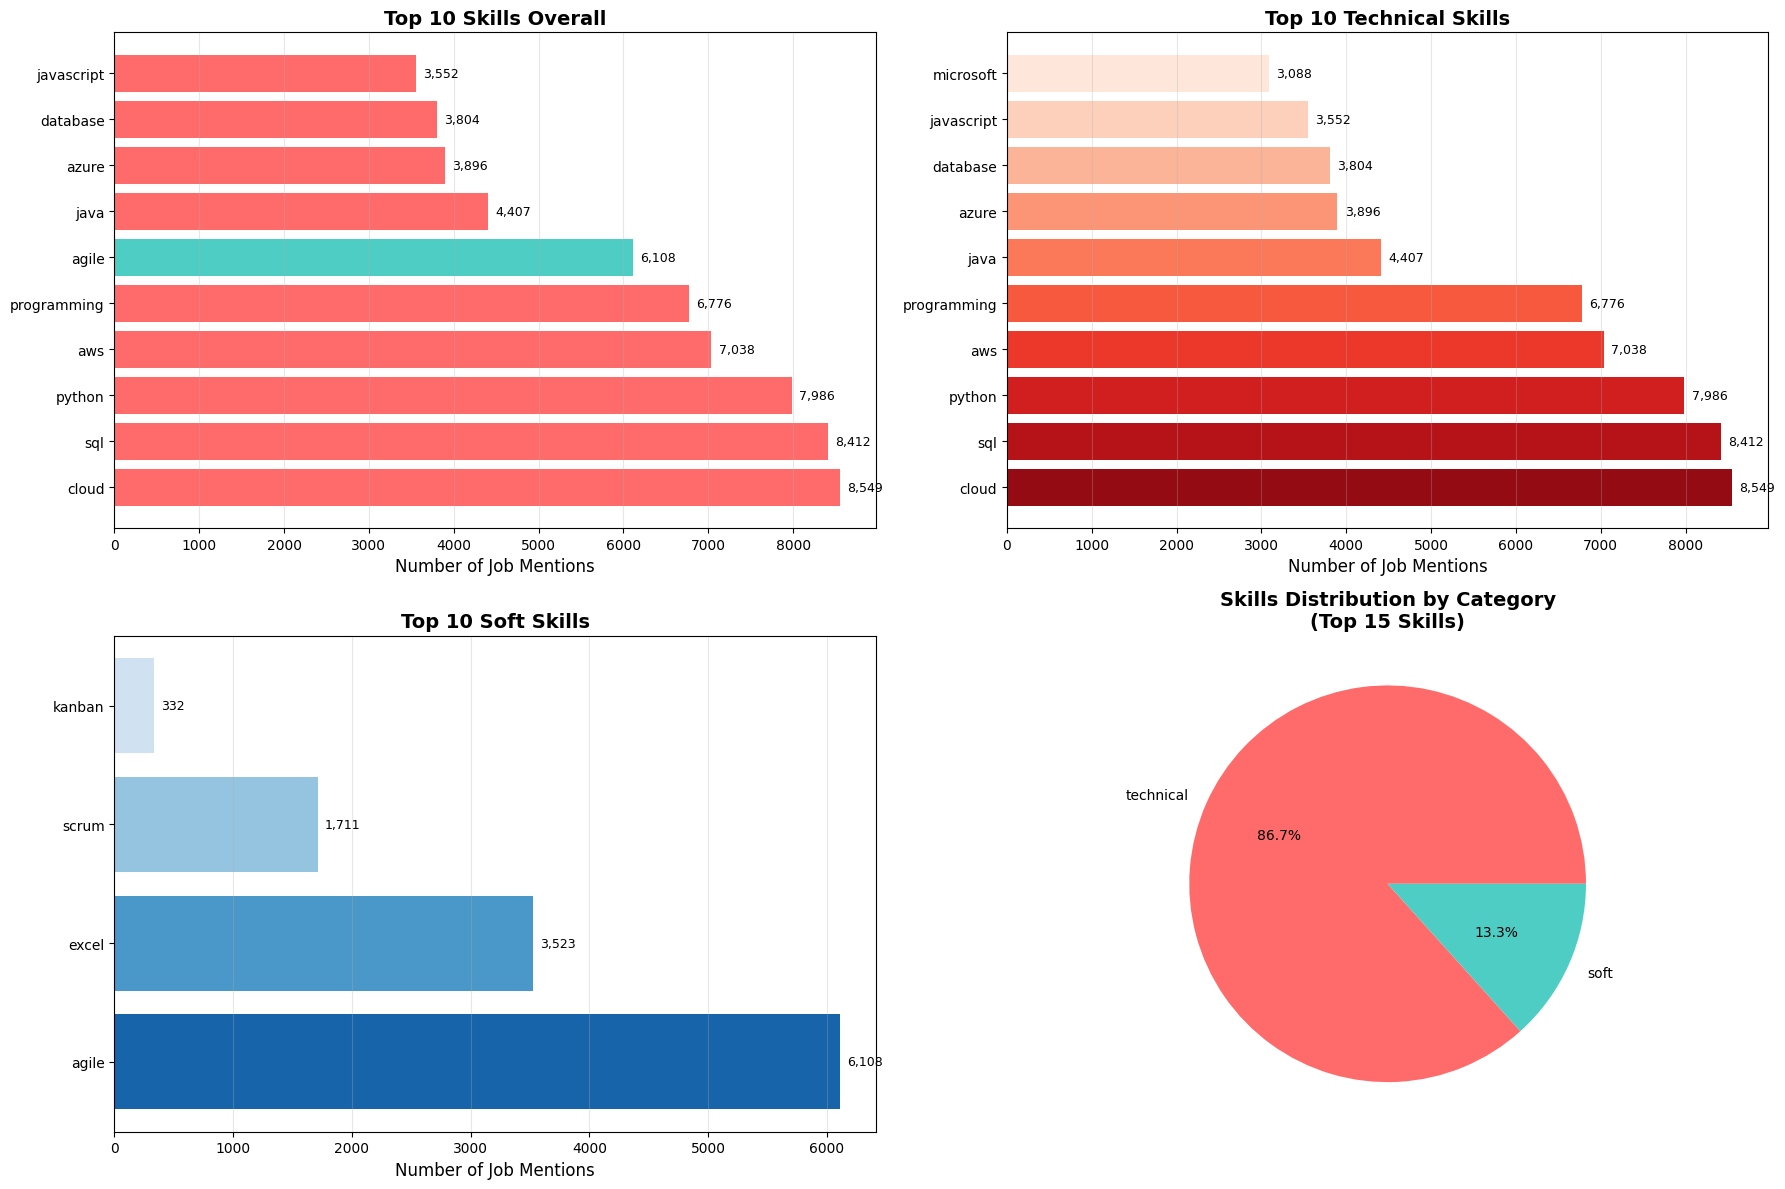


📈 Chart saved to: ../assets/charts/skills_demand.png


In [18]:
# Create skills demand visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# 1. Overall Top Skills
top_10_skills = top_skills_df.head(10)
colors = ['#FF6B6B' if cat == 'technical' else '#4ECDC4' for cat in top_10_skills['skill_category']]

ax1.barh(range(len(top_10_skills)), top_10_skills['job_count'], color=colors)
ax1.set_yticks(range(len(top_10_skills)))
ax1.set_yticklabels([skill[:20] + '...' if len(skill) > 20 else skill 
                     for skill in top_10_skills['skill_name']], fontsize=10)
ax1.set_xlabel('Number of Job Mentions', fontsize=12)
ax1.set_title('Top 10 Skills Overall', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_10_skills['job_count']):
    ax1.text(v + max(top_10_skills['job_count']) * 0.01, i, f'{v:,}', 
             va='center', fontsize=9)

# 2. Technical Skills
if not technical_skills_df.empty:
    ax2.barh(range(len(technical_skills_df)), technical_skills_df['job_count'],
             color=sns.color_palette("Reds_r", len(technical_skills_df)))
    ax2.set_yticks(range(len(technical_skills_df)))
    ax2.set_yticklabels([skill[:20] + '...' if len(skill) > 20 else skill 
                         for skill in technical_skills_df['skill_name']], fontsize=10)
    ax2.set_xlabel('Number of Job Mentions', fontsize=12)
    ax2.set_title('Top 10 Technical Skills', fontsize=14, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(technical_skills_df['job_count']):
        ax2.text(v + max(technical_skills_df['job_count']) * 0.01, i, f'{v:,}', 
                 va='center', fontsize=9)
else:
    ax2.text(0.5, 0.5, 'No Technical Skills Data', ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Top 10 Technical Skills', fontsize=14, fontweight='bold')

# 3. Soft Skills
if not soft_skills_df.empty:
    ax3.barh(range(len(soft_skills_df)), soft_skills_df['job_count'],
             color=sns.color_palette("Blues_r", len(soft_skills_df)))
    ax3.set_yticks(range(len(soft_skills_df)))
    ax3.set_yticklabels([skill[:20] + '...' if len(skill) > 20 else skill 
                         for skill in soft_skills_df['skill_name']], fontsize=10)
    ax3.set_xlabel('Number of Job Mentions', fontsize=12)
    ax3.set_title('Top 10 Soft Skills', fontsize=14, fontweight='bold')
    ax3.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(soft_skills_df['job_count']):
        ax3.text(v + max(soft_skills_df['job_count']) * 0.01, i, f'{v:,}', 
                 va='center', fontsize=9)
else:
    ax3.text(0.5, 0.5, 'No Soft Skills Data', ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Top 10 Soft Skills', fontsize=14, fontweight='bold')

# 4. Skills Category Distribution
category_counts = top_skills_df['skill_category'].value_counts()
ax4.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
ax4.set_title('Skills Distribution by Category\n(Top 15 Skills)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../assets/charts/skills_demand.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📈 Chart saved to: ../assets/charts/skills_demand.png")

In [19]:
# Generate business insights on skill market trends
print("\n💡 Business Insights - Skills Demand Analysis:")
print("=" * 60)

# Get key metrics
if not top_skills_df.empty:
    top_skill = top_skills_df.iloc[0]['skill_name']
    top_skill_count = top_skills_df.iloc[0]['job_count']
    top_skill_pct = top_skills_df.iloc[0]['percentage_of_jobs']
    top_skill_category = top_skills_df.iloc[0]['skill_category']
    
    # Calculate technical vs soft skills distribution
    tech_skills_count = len(top_skills_df[top_skills_df['skill_category'] == 'technical'])
    soft_skills_count = len(top_skills_df[top_skills_df['skill_category'] == 'soft'])
    total_top_skills = len(top_skills_df)
    
    # Generate insights
    insight_1 = f"The most demanded skill is '{top_skill}' ({top_skill_category}) appearing in {top_skill_count:,} job postings ({top_skill_pct}% of jobs with skills data), highlighting its critical importance in the current job market."
    
    insight_2 = f"Among the top 15 skills, {tech_skills_count} are technical skills while {soft_skills_count} are soft skills, showing that employers value {'technical expertise more heavily' if tech_skills_count > soft_skills_count else 'a balanced mix of technical and soft skills' if tech_skills_count == soft_skills_count else 'soft skills significantly'}."
    
    # Analyze skill diversity across roles
    unique_roles_with_skills = skills_by_role_df['job_title'].nunique()
    avg_skills_per_role = skills_by_role_df.groupby('job_title')['skill_name'].nunique().mean()
    
    insight_3 = f"Skills requirements vary significantly across the top {unique_roles_with_skills} job roles, with an average of {avg_skills_per_role:.1f} unique skills mentioned per role, indicating specialized skill demands for different positions."
    
    print(f"1. {insight_1}")
    print(f"\n2. {insight_2}")
    print(f"\n3. {insight_3}")
    
else:
    print("No skills data available for analysis.")

print("\n✅ Skills Demand Analysis completed successfully!")


💡 Business Insights - Skills Demand Analysis:
1. The most demanded skill is 'cloud' (technical) appearing in 8,549 job postings (37.33% of jobs with skills data), highlighting its critical importance in the current job market.

2. Among the top 15 skills, 13 are technical skills while 2 are soft skills, showing that employers value technical expertise more heavily.

3. Skills requirements vary significantly across the top 5 job roles, with an average of 139.2 unique skills mentioned per role, indicating specialized skill demands for different positions.

✅ Skills Demand Analysis completed successfully!


In [20]:
# Close database connection
db_manager.close()
print("Database connection closed.")

2025-08-14 22:16:56,245 - INFO - Database connections closed


Database connection closed.
